In [1]:
#DATA READING

import pandas as pd
import numpy as np

housing = pd.read_csv(r"C:\Users\User\Desktop\AZUBI AFRICA\Trainings\WEEK 11\housing.csv")

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Data Preparation: Split data into train and test sets

In [2]:
from sklearn.model_selection import train_test_split 

train, test = train_test_split(housing, test_size = 0.2, random_state = 42)

### We can check the size of  test sets with the shape() function

In [3]:
 test.shape

(4128, 10)

### CLEAN OUR TEST DATA

CHECKING FOR MISSING VALUES

In [4]:
test.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### CHECK FOR OUTLIERS

In [5]:
test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

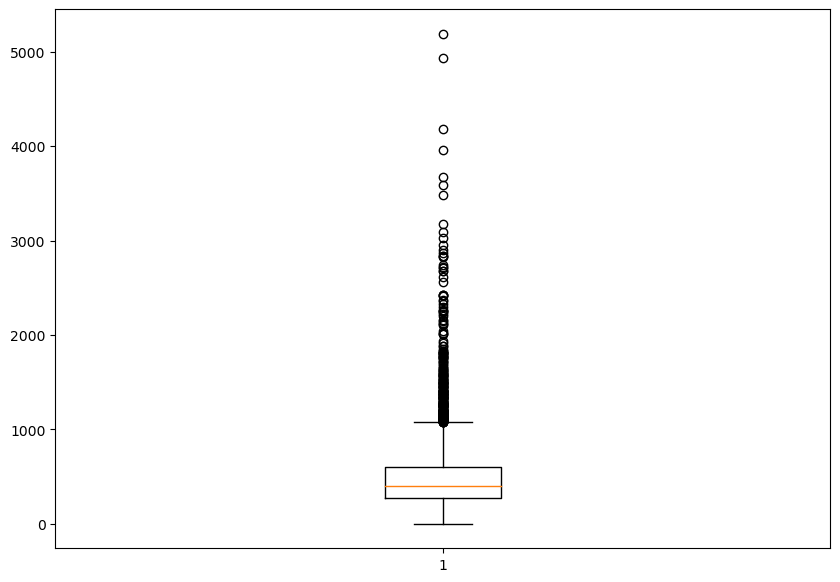

In [6]:
# Checking for outfliers using boxplot

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))

plt.boxplot(test['households'])

plt.show()

### from the above, it is obvious that we have missing values and outliers. so, we shall be using imputer with 'Median" as our strategy in the simple imputer!!!

In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

### Since the Imputer can only compute numerical values, we shall the the Categorical value Column

In [8]:
test_num = test.drop("ocean_proximity", axis=1)

test_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0


### Fitting the imputer instance to the test data using the fit() method

In [9]:
imputer.fit(test_num)

SimpleImputer(strategy='median')

In [10]:
imputer.statistics_

array([-1.1847e+02,  3.4230e+01,  2.9000e+01,  2.1100e+03,  4.2800e+02,
        1.1600e+03,  4.0600e+02,  3.5000e+00,  1.7865e+05])

In [11]:
# Compare the imputer.statistics_ with test_num median values

test_num.median().values

array([-1.1847e+02,  3.4230e+01,  2.9000e+01,  2.1100e+03,  4.2800e+02,
        1.1600e+03,  4.0600e+02,  3.5000e+00,  1.7865e+05])

### Using the “trained” imputer to transform the testing set by replacing missing valuesby the learned medians:

In [12]:
X = imputer.transform(test_num)

X

array([[-1.19010e+02,  3.60600e+01,  2.50000e+01, ...,  3.59000e+02,
         1.68120e+00,  4.77000e+04],
       [-1.19460e+02,  3.51400e+01,  3.00000e+01, ...,  5.84000e+02,
         2.53130e+00,  4.58000e+04],
       [-1.22440e+02,  3.78000e+01,  5.20000e+01, ...,  9.63000e+02,
         3.48010e+00,  5.00001e+05],
       ...,
       [-1.22050e+02,  3.73100e+01,  2.50000e+01, ...,  5.68000e+02,
         9.22980e+00,  5.00001e+05],
       [-1.19760e+02,  3.67700e+01,  3.60000e+01, ...,  4.74000e+02,
         2.78500e+00,  7.23000e+04],
       [-1.18370e+02,  3.42200e+01,  1.70000e+01, ...,  4.48000e+02,
         3.55210e+00,  1.51500e+05]])

In [13]:
# Converting the above plain NumPy array to pandas dataframe

test_tr = pd.DataFrame(X, columns = test_num.columns)

test_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.01,36.06,25.0,1505.0,428.0,1392.0,359.0,1.6812,47700.0
1,-119.46,35.14,30.0,2943.0,428.0,1565.0,584.0,2.5313,45800.0
2,-122.44,37.80,52.0,3830.0,428.0,1310.0,963.0,3.4801,500001.0
3,-118.72,34.28,17.0,3051.0,428.0,1705.0,495.0,5.7376,218600.0
4,-121.93,36.62,34.0,2351.0,428.0,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
4123,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0
4124,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0
4125,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0
4126,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0


### Handling Categorical Features using One-Hot Encoding

In [14]:
test_cat = test[["ocean_proximity"]]

test_cat.head(10)

,ocean_proximity
20046,INLAND
3024,INLAND
15663,NEAR BAY
20484,<1H OCEAN
9814,NEAR OCEAN
13311,INLAND
7113,<1H OCEAN
7668,<1H OCEAN
18246,NEAR BAY
5723,<1H OCEAN


In [15]:
# Importing One Hot Encoder

from sklearn.preprocessing import OneHotEncoder 

cat_encoder = OneHotEncoder()

test_cat_1hot = cat_encoder.fit_transform(test_cat)

test_cat_1hot

<4128x5 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

In [16]:
# convertto a (dense) NumPy array by calling the toarray() method:

test_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [17]:
# Getting the list of categories using the encoder’s categories_instance variable:

cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Feature engineering: creating extra columns for more insights from our data

In [18]:
test["rooms_per_household"] = test["total_rooms"]/test["households"]

test["bedrooms_per_room"] = test["total_bedrooms"]/test["total_rooms"]

test["population_per_household"] = test["population"]/test["households"]

### Let’s look at the correlation matrix:

In [19]:
corr_matrix = test.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.677502
total_rooms                 0.134697
rooms_per_household         0.130928
housing_median_age          0.113585
households                  0.074249
total_bedrooms              0.056667
population                 -0.019003
longitude                  -0.044062
population_per_household   -0.121853
latitude                   -0.149295
bedrooms_per_room          -0.249196
Name: median_house_value, dtype: float64

### Feature Scaling & Transformation Pipelines( split data into input and output)

In [20]:
test_labels = test['median_house_value'].copy()

# drop the labels from the test set via the pandas drop function:

test = test.drop('median_house_value', axis=1)

# axis=1 means that median_house_value should be dropped column wise, meaning, the whole column will be dropped

test_num = test.drop("ocean_proximity", axis=1)

#  re-do since the additional columns rooms_per_household, bedrooms_per_room and population_per_household where added

test_labels.head()

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: median_house_value, dtype: float64

In [21]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,INLAND,4.192201,NaN,3.877437
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,INLAND,5.039384,NaN,2.679795
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,NEAR BAY,3.977155,NaN,1.360332
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,<1H OCEAN,6.163636,NaN,3.444444
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,NEAR OCEAN,5.492991,NaN,2.483645


In [22]:
test_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,4.192201,NaN,3.877437
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,5.039384,NaN,2.679795
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,3.977155,NaN,1.360332
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,6.163636,NaN,3.444444
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,5.492991,NaN,2.483645


In [23]:
# Feature scaling using standard Scaler, Replacing missing numerical values 

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),('std_scaler', StandardScaler())])

test_num_tr = num_pipeline.fit_transform(test_num)

test_num_tr

array([[ 0.25541734,  0.22194113, -0.30073951, ..., -0.43367721,
        -0.16042695,  0.52022395],
       [ 0.02976613, -0.20947715,  0.098724  , ..., -0.13050312,
        -0.16042695, -0.16293193],
       [-1.46454628,  1.03788441,  1.85636346, ..., -0.51063381,
        -0.16042695, -0.91557569],
       ...,
       [-1.2689819 ,  0.80810728, -0.30073951, ...,  0.65618087,
        -1.45960578, -0.09978765],
       [-0.120668  ,  0.5548835 ,  0.57808022, ..., -0.04116447,
        -0.48579064, -0.21494651],
       [ 0.57634349, -0.64089543, -0.93988113, ..., -0.50645235,
         0.81025277,  0.43607226]])

### Using ColumnTransformer to handle Categorical and Numerical Columns

In [24]:
from sklearn.compose import ColumnTransformer

num_attribs = list(test_num)

cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs), ("cat",OneHotEncoder(), cat_attribs) ])

test_prepared = full_pipeline.fit_transform(test)

test_prepared

array([[ 0.25541734,  0.22194113, -0.30073951, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02976613, -0.20947715,  0.098724  , ...,  0.        ,
         0.        ,  0.        ],
       [-1.46454628,  1.03788441,  1.85636346, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.2689819 ,  0.80810728, -0.30073951, ...,  0.        ,
         0.        ,  0.        ],
       [-0.120668  ,  0.5548835 ,  0.57808022, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57634349, -0.64089543, -0.93988113, ...,  0.        ,
         0.        ,  0.        ]])

In [25]:
test_prepared.shape

(4128, 16)

### Modeling Our Test Set Using Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(test_prepared, test_labels)

LinearRegression()

### Now the Linear Regression model is working. Let’s Predict some values from the Test set:

In [27]:
some_data = test.iloc[:5]

some_labels = test_labels.iloc[:5]

# transform / prepare some data 

some_data_prepared = full_pipeline.transform(some_data)

# make predictions

print("Predictions:", lin_reg.predict(some_data_prepared))


Predictions: [ 44716.39774671 144106.84827943 307690.99596094 279321.21705505
 268801.9121698 ]


###  Let's compare the result with the actual which is some_labels

In [28]:
print("Labels:",list(some_labels))

Labels: [47700.0, 45800.0, 500001.0, 218600.0, 278000.0]


### EVALUATION OF THE PREDICTED VALUES: Checking the errors based on the values our model predicted and the actual values from the test dataset. 

### MEASURING THE TEST DATA ROOT MEANS SQUARED ERROR

In [29]:
from sklearn.metrics import mean_squared_error

test_predictions = lin_reg.predict(test_prepared)

lin_mse = mean_squared_error(test_labels, test_predictions)

lin_rmse = np.sqrt(lin_mse)

lin_rmse

68748.60903173663

### The result is clearly not a great score:  

Most district’s me-dian_housing_value range between 120.000 and 265.000 (as seen from the box plot previously), so a typical prediction error of 68.593 is not very satisfying (note, your score might differ from ours).

This is an example of a model underfitting the Test data. 

When this happens it can mean that the features do not provide enough information to make a good predictions, or that the model is not powerful enough. The main ways to fix underfitting are to select a more powerful model or to feed the Test model with better features. 

We could try to add more features (e.g., the log ofthe population), but we can first try a more complex model to see how it does in our subsiquent analysis.

### Cross Validating Linear Regression

In [31]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg,test_prepared,test_labels,scoring = "neg_mean_squared_error", cv = 10)

lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(lin_rmse_scores)

Scores: [67404.97038787 69127.6550799  75864.82154489 72152.56108756
 72250.30236857 64321.316356   67504.69067265 74197.44724277
 68214.96737372 71915.32682217]
Mean: 70295.40589361063
Standard deviation: 3371.4007163622096


### MODELING OUR TEST SET USING  DECISION TREE 

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(test_prepared, test_labels)

DecisionTreeRegressor()

### Now that the model is trained, let’s evaluate it on the test set:

In [33]:
test_predictions = tree_reg.predict(test_prepared)

tree_mse = mean_squared_error(test_labels, test_predictions)

tree_rmse = np.sqrt(tree_mse)

tree_rmse

0.0

### We got  No error at all? Could this model really be absolutely perfect? Of course, it is much more likely that the model is badly overfitting the data. How can you be sure? We can Validate this using CROSS - VALIDATION!!!


In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, test_prepared, test_labels,scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores=np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [85763.0888735  80566.6191642  75369.99842132 82173.70034924
 84890.97151413 75931.77650902 75768.0931878  81723.86767498
 76148.60143832 76802.18807289]
Mean: 79513.89052054002
Standard deviation: 3791.3742358467816


### The Decision Tree model is overfitting so badly that it performs worse than the LinearRegression model. Decision Tree has a mean value of 79513.89 compare to LinearRegression with 70295.41!!!

### MODELING OUR TEST SET USING RANDOM FOREST MODEL

In [35]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_reg.fit(test_prepared, test_labels)

test_predictions = forest_reg.predict(test_prepared)

forest_mse = mean_squared_error(test_labels, test_predictions)

forest_rmse = np.sqrt(tree_mse) 

forest_rmse

0.0

### CROSS VALIDATION RANDOM FOREST MODEL

In [36]:
forest_scores = cross_val_score(forest_reg, test_prepared,test_labels,scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [54049.89273763 53061.28093861 57762.46586501 61944.13839158
 55537.99799307 51388.78121886 52109.17802746 58612.40628551
 57633.71930231 53348.47814665]
Mean: 55544.833890669615
Standard deviation: 3192.8959731146074


### From the above code our output, the overall RMSE = 55.544 Note that the score on the test set is still much lower than on the validation sets, meaning that the model is still overfitting the training set..

### Fine-Tune Our  RandomForestRegressor Model!!!


In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = [ {'n_estimators': [3,10,30],'max_features': [2,4,6,8]},{'bootstrap': [False],'n_estimators': [3,10],
                                                                      'max_features': [2,3,4]},]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(test_prepared, test_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:

# our result {'max_features': 8, 'n_estimators': 30}

grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

### We can also get the best estimator directly as shown below: 

In [40]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

### The evaluation scores are also available as shown below:

In [41]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

71607.40051255151 {'max_features': 2, 'n_estimators': 3}
62811.244616306045 {'max_features': 2, 'n_estimators': 10}
58239.136962145174 {'max_features': 2, 'n_estimators': 30}
67529.47409471439 {'max_features': 4, 'n_estimators': 3}
57544.35663155679 {'max_features': 4, 'n_estimators': 10}
56849.00251549282 {'max_features': 4, 'n_estimators': 30}
65841.27769186538 {'max_features': 6, 'n_estimators': 3}
58087.47525343982 {'max_features': 6, 'n_estimators': 10}
55608.54141048943 {'max_features': 6, 'n_estimators': 30}
64371.523265844524 {'max_features': 8, 'n_estimators': 3}
57673.95241135306 {'max_features': 8, 'n_estimators': 10}
55304.477930366236 {'max_features': 8, 'n_estimators': 30}
69081.93836363892 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
60683.31632598919 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
66627.66977306562 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
58336.18311514609 {'bootstrap': False, 'max_features': 3, 'n_estimators'

### In this Test Set, we obtain the best solution by setting the max_features hyperparameter to 8,and the n_estimators hyperparameter to 30. The RMSE score for this combination is 55.304, which is slightly better than the score you got earlier using the default hyperparameter values (which was 55,544). Congratulations, you have successfully fine-tuned yourbest model!

In [42]:
import pickle


#from sklearn.externals import joblib

filename = 'forest_housing_model.pkl'

#joblib.dump(grid_search.best_estimator_,filename)

filename = 'forest_housing_model.sav'

pickle.dump(grid_search.best_estimator_,open(filename,'wb'))

In [44]:
# if you want re-load the model you can use the following code:

model = pickle.load(open(filename,'rb'))

model

RandomForestRegressor(max_features=8, n_estimators=30)